In [1]:
#import modules 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
# Import stopwords with nltk.
import nltk
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from collections import Counter
from imblearn.combine import SMOTETomek 

from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
#load Data 
df = pd.read_csv("Job titles and industries.csv")
df.head(10)

,job title,industry
0,technical support and helpdesk supervisor - co...,IT
1,senior technical support engineer,IT
2,head of it services,IT
3,js front end engineer,IT
4,network and telephony controller,IT
5,privileged access management expert,IT
6,devops engineers x 3 - global brand,IT
7,devops engineers x 3 - global brand,IT
8,data modeller,IT
9,"php web developer £45,000 based in london",IT


#### Explore data


In [3]:
#Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8586 entries, 0 to 8585
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job title  8586 non-null   object
 1   industry   8586 non-null   object
dtypes: object(2)
memory usage: 134.3+ KB


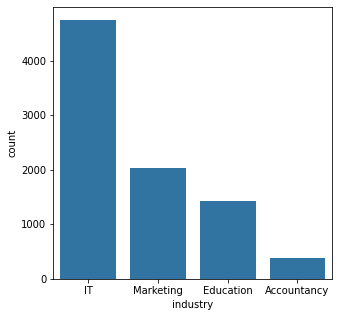

In [4]:
#Data classes distribution 
plt.figure(figsize=(5, 5))
sb.countplot(data=df, x="industry",color = sb.color_palette()[0]); 


In [5]:
#check Null values 
df.isna().sum()

job title    0
industry     0
dtype: int64

In [6]:
#check for duplicated values
df.duplicated().sum()


4618

More than half of the available data are duplicates !!


In [7]:
#drop duplicated rows
unique_df = df.drop_duplicates()
unique_df.shape

(3968, 2)

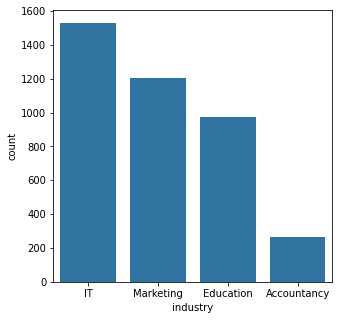

In [8]:
#unique Data classes distribution 
plt.figure(figsize=(5, 5))
sb.countplot(data=unique_df, x="industry",color = sb.color_palette()[0]); 


Removing duplicate data helped partially to solve the problem of imbalanced data . 

### Data Cleaning

In [9]:
#remove stop words
nltk.download('stopwords')
stop = stopwords.words('english')
unique_df['clean_job_title'] = unique_df['job title'].apply(lambda x: [item for item in str(x).split() if item not in stop])
unique_df['clean_job_title']  = unique_df['clean_job_title'].apply(lambda x: ', '.join(x))
#remove special characers
unique_df['clean_job_title'] = unique_df['clean_job_title'].map(lambda x: re.sub(r'\W+', ' ', x))
#remove numbers
unique_df['clean_job_title'] = unique_df['clean_job_title'].str.replace('\d+', ' ')
#remove words less than 2 chars
unique_df['clean_job_title'] = unique_df['clean_job_title'].str.replace(r'\b(\w{1,2})\b', ' ')
#applay lower case 
unique_df['clean_job_title'] = unique_df['clean_job_title'].str.lower()

[nltk_data] Downloading package stopwords to /home/roaa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
unique_df.head(20)

,job title,industry,clean_job_title
0,technical support and helpdesk supervisor - co...,IT,technical support helpdesk supervisor county b...
1,senior technical support engineer,IT,senior technical support engineer
2,head of it services,IT,head services
3,js front end engineer,IT,front end engineer
4,network and telephony controller,IT,network telephony controller
5,privileged access management expert,IT,privileged access management expert
6,devops engineers x 3 - global brand,IT,devops engineers global brand
8,data modeller,IT,data modeller
9,"php web developer £45,000 based in london",IT,php web developer based london
12,solution / technical architect - ethical brand,IT,solution technical architect ethical brand


## The Model

### Split data into test set and train set

In [11]:
X = unique_df['clean_job_title']
y = unique_df['industry']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

### Solve imbalanced data problem

#### First approach estimate sample weights by class 

In [12]:
weights = compute_sample_weight("balanced",y_train)
print('The classes weights : ', np.unique(weights) )

The classes weights :  [0.65840708 0.82758621 1.00404858 3.61165049]


F1-score :  LogisticRegression
              precision    recall  f1-score   support

 Accountancy       0.82      0.70      0.75        57
   Education       0.85      0.90      0.87       232
          IT       0.87      0.87      0.87       399
   Marketing       0.82      0.81      0.81       304

    accuracy                           0.85       992
   macro avg       0.84      0.82      0.83       992
weighted avg       0.85      0.85      0.85       992

--------------------------------------------------------------------------


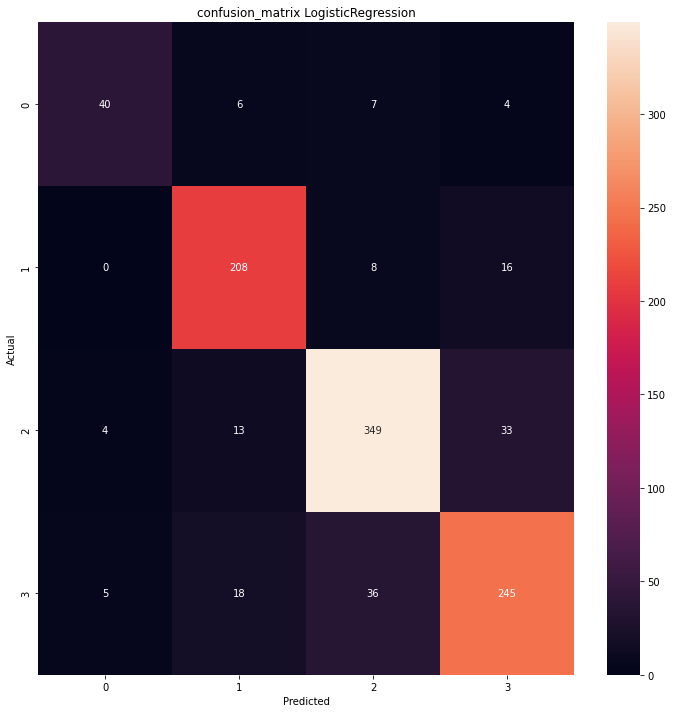

F1-score :  MultinomialNB
              precision    recall  f1-score   support

 Accountancy       0.62      0.84      0.72        57
   Education       0.93      0.86      0.89       232
          IT       0.95      0.87      0.91       399
   Marketing       0.81      0.89      0.85       304

    accuracy                           0.87       992
   macro avg       0.83      0.87      0.84       992
weighted avg       0.88      0.87      0.87       992

--------------------------------------------------------------------------


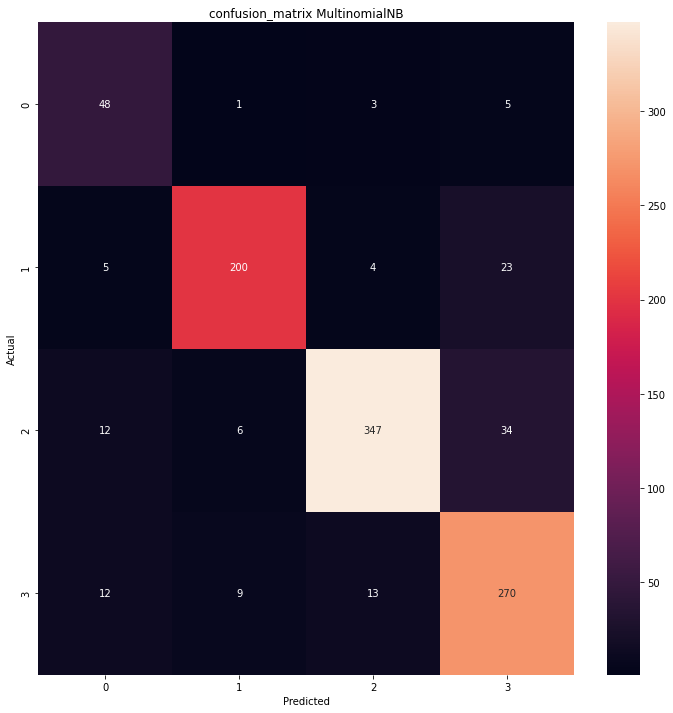

F1-score :  SGDClassifier
              precision    recall  f1-score   support

 Accountancy       0.75      0.84      0.79        57
   Education       0.93      0.88      0.91       232
          IT       0.94      0.88      0.91       399
   Marketing       0.82      0.89      0.86       304

    accuracy                           0.88       992
   macro avg       0.86      0.88      0.87       992
weighted avg       0.89      0.88      0.89       992

--------------------------------------------------------------------------


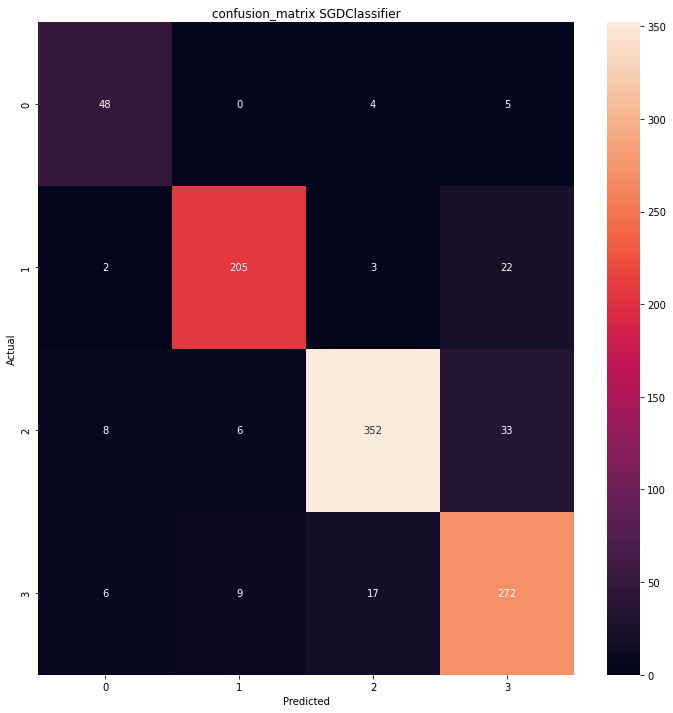

,Modelling Algo,Train accuracy,Test accuracy
0,LogisticRegression,0.954637,0.848790
1,MultinomialNB,0.909274,0.871976
2,SGDClassifier,0.919355,0.884073


In [13]:
#Model
models=[LogisticRegression(n_jobs=1, C=1e5),
       MultinomialNB(alpha = 0.7),
       SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=0, max_iter=1000, tol=None),
       ]
model_names=['LogisticRegression','MultinomialNB','SGDClassifier']
train_acc =[]
test_acc = []
d={}
for model in range (len(models)):
    Classifier = models[model]
    #pipline stages
    # 1-Convert a collection of text documents to a matrix
    # 2-Transform a count matrix to a normalized tf-idf representation
    # 3-Classifier 
    pipline = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('Model', Classifier ),])
    pipline.fit(X_train ,y_train, **{'Model__sample_weight': weights})
    y_pred=pipline.predict(X_test)
    Y = pipline.predict(X_train)
    #Evaluating using F1-score for classes
    print('F1-score : ' ,model_names[model] )
    print(metrics.classification_report(y_test, y_pred))
    print('--------------------------------------------------------------------------')
    #Evaluating using Accuracy
    train_acc.append(accuracy_score(y_train,Y))
    test_acc.append(accuracy_score(y_test, y_pred))
    #Evaluating using confusion matrix
    conf_mat = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(12,12))
    sb.heatmap(conf_mat, annot=True, fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('confusion_matrix ' + model_names[model])
    plt.show()
d={'Modelling Algo':model_names,'Train accuracy':train_acc ,'Test accuracy': test_acc}   
rmsle_frame=pd.DataFrame(d)
rmsle_frame


#### Second approach Over-sampling followed by under-sampling

In [14]:
#Convert a collection of text documents to a matrix
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

#Transform a count matrix to a normalized tf-idf representation
Tfidf = TfidfTransformer()
X_train_tf = Tfidf.fit_transform(X_train_vect)
X_test_tf  = Tfidf.transform(X_test_vect)

print('Original dataset shape %s' % Counter(y_train ))
smt = SMOTETomek(random_state=42)
X_train_res, y_train_res = smt.fit_resample(X_train_tf, y_train)
print('Resampled dataset shape %s' % Counter(y_train_res))


Original dataset shape Counter({'IT': 1130, 'Marketing': 899, 'Education': 741, 'Accountancy': 206})
Resampled dataset shape Counter({'Accountancy': 1130, 'Education': 1117, 'Marketing': 1102, 'IT': 1097})


F1-score :  LogisticRegression
              precision    recall  f1-score   support

 Accountancy       0.82      0.70      0.75        57
   Education       0.83      0.89      0.86       232
          IT       0.86      0.86      0.86       399
   Marketing       0.81      0.79      0.80       304

    accuracy                           0.84       992
   macro avg       0.83      0.81      0.82       992
weighted avg       0.84      0.84      0.84       992

--------------------------------------------------------------------------


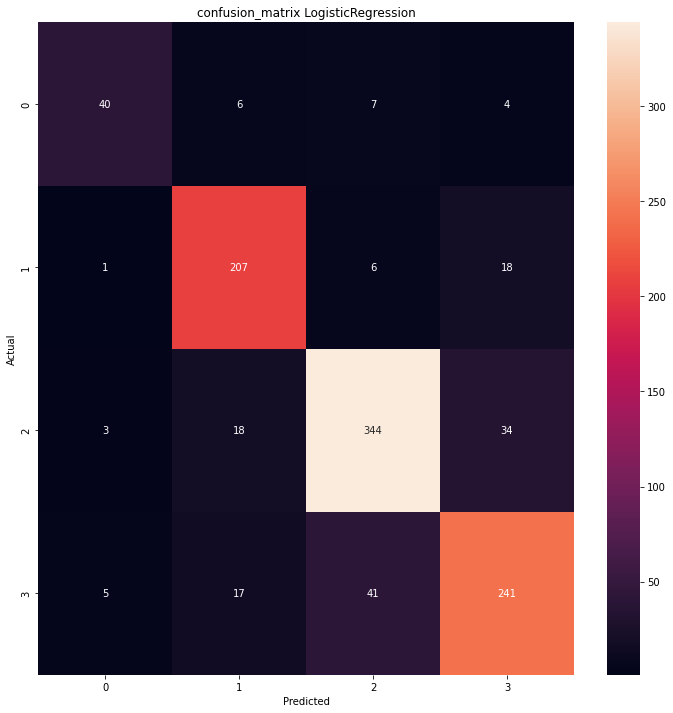

F1-score :  MultinomialNB
              precision    recall  f1-score   support

 Accountancy       0.64      0.84      0.73        57
   Education       0.93      0.85      0.89       232
          IT       0.94      0.87      0.90       399
   Marketing       0.81      0.88      0.84       304

    accuracy                           0.87       992
   macro avg       0.83      0.86      0.84       992
weighted avg       0.88      0.87      0.87       992

--------------------------------------------------------------------------


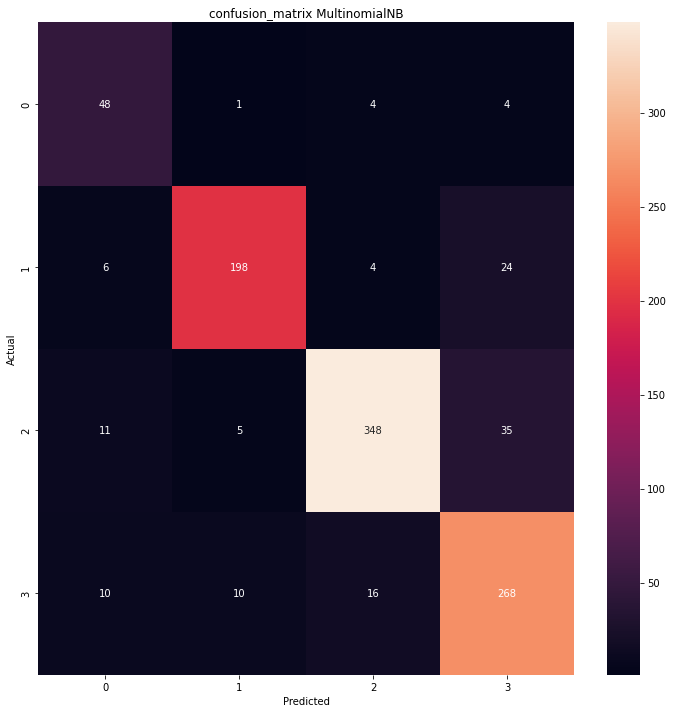

F1-score :  SGDClassifier
              precision    recall  f1-score   support

 Accountancy       0.74      0.81      0.77        57
   Education       0.92      0.89      0.91       232
          IT       0.93      0.88      0.90       399
   Marketing       0.82      0.89      0.85       304

    accuracy                           0.88       992
   macro avg       0.85      0.87      0.86       992
weighted avg       0.88      0.88      0.88       992

--------------------------------------------------------------------------


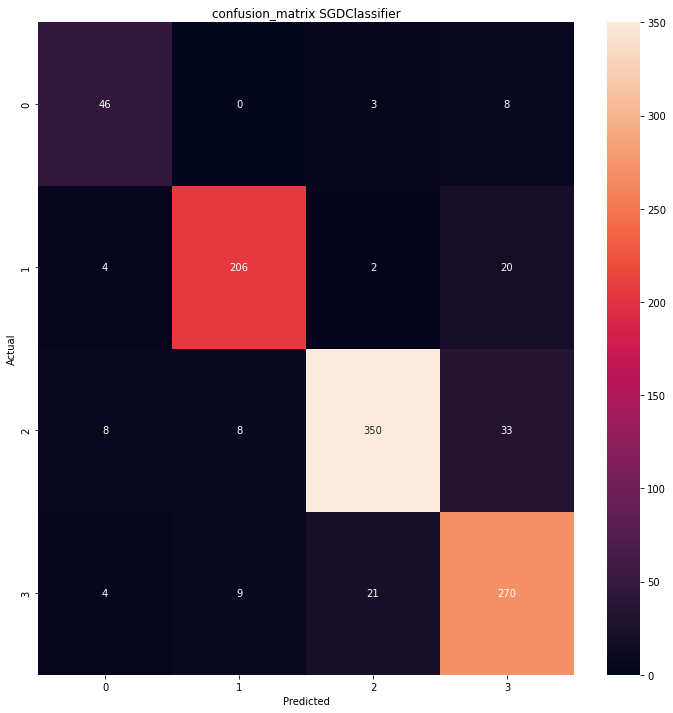

,Modelling Algo,Train accuracy,Test accuracy
0,LogisticRegression,0.968286,0.838710
1,MultinomialNB,0.936347,0.868952
2,SGDClassifier,0.957715,0.879032


In [15]:
#Model
models=[LogisticRegression(n_jobs=1, C=1e5),
       MultinomialNB(alpha = 0.7),
       SGDClassifier(loss='hinge', penalty='l1',alpha=1e-4, random_state=0, max_iter=5, tol=None),
       ]
model_names=['LogisticRegression','MultinomialNB','SGDClassifier']
train_acc =[]
test_acc = []
d={}
for model in range (len(models)):
    Classifier = models[model]
    Classifier.fit(X_train_res, y_train_res)
    y_pred=Classifier.predict(X_test_tf)
    Y = Classifier.predict(X_train_res)
    #Evaluating using F1-score for classes
    print('F1-score : ' ,model_names[model] )
    print(metrics.classification_report(y_test, y_pred))
    print('--------------------------------------------------------------------------')
    #Evaluating using Accuracy
    train_acc.append(accuracy_score(y_train_res,Y))
    test_acc.append(accuracy_score(y_test, y_pred))
    #Evaluating using confusion matrix
    conf_mat = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(12,12))
    sb.heatmap(conf_mat, annot=True, fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('confusion_matrix ' + model_names[model])
    plt.show()
d={'Modelling Algo':model_names,'Train accuracy':train_acc ,'Test accuracy': test_acc}   
rmsle_frame=pd.DataFrame(d)
rmsle_frame


### select model


The two methods used gives results that are very close to each other, but the frist method gives higher accuracy (F1-score) and there is no overfitting ,  thus I will use the frist method with SGDClassifier model .


In [16]:
# selected_model = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
# selected_model.fit(X_train_res, y_train_res)

selected_model = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('Model', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=0, max_iter=1000, tol=None) ),])
selected_model.fit(X_train ,y_train, **{'Model__sample_weight': weights})

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('Model',
                 SGDClassifier(alpha=0.001, random_state=0, tol=None))])

### Save selected Model 


In [17]:
from joblib import dump, load
dump(selected_model, 'selected_model.joblib')

['selected_model.joblib']